<a href="https://colab.research.google.com/github/Gauravhulmukh/All_ml_algorithm_from_scratch/blob/master/Logistic%20Regression/Binomial_Logistic_Regression_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binomial Logistic Regression using Gradient Descent :**<br>
In Linear Regression, the output is the weighted sum of inputs.<br> In Logistic Regression, we don’t output the weighted sum of inputs directly, but we pass it through a **Sigmoid** function that can map any real value between 0 and 1.<br>





In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
x_train = train_data[['x1','x2']].values
y_train = train_data['y'].values
x_test = test_data[['x1','x2']].values
y_test = test_data['y'].values

In [60]:
x_train.shape,x_test.shape

((80, 2), (20, 2))

![alt text](https://github.com/Gauravhulmukh/programming-foundation-with-python-from-udacity/blob/master/normalization%20formula.png?raw=true)

In [0]:
def normalize(x): #Normalize
  x_min = np.min(x,axis=0)
  x_max = np.max(x,axis=0)
  x_minmax_range = x_max - x_min
  norm_x = np.divide((x-x_min),x_minmax_range)
  return norm_x

Z-score is one of the most popular methods to standardize data, and can be done by subtracting the mean and dividing by the standard deviation for each value of each feature.

![alt text](https://github.com/Gauravhulmukh/programming-foundation-with-python-from-udacity/blob/master/standardize%20input.png?raw=true)

In [0]:
def standardized(x): # Standardized with mean 0 and std-dev of 1, also called z-score 
  x_mean = np.mean(x,axis=0)
  x_std = np.std(x,axis=0)
  stdz_x = np.divide((x-x_mean),x_std)  
  return stdz_x

In [0]:
# Rescaled and standardized input
x_train_rescaled = normalize(x_train)
x_train_standardized = standardized(x_train)

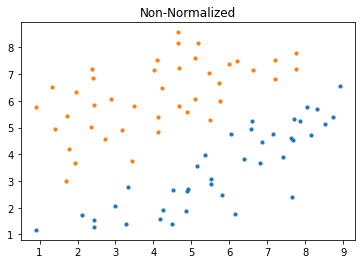

In [38]:
def plot_2d(x, y, title, ax=None):
    x_1 = x[np.where(y == 1)]
    x_0 = x[np.where(y == 0)]
    if ax == None:
        fig = plt.figure()
        ax = plt.axes()
    ax.scatter(x_1[:, 0], x_1[:, 1], s=10) # y = 1 # blue
    ax.scatter(x_0[:, 0], x_0[:, 1], s=10) # y = 0 # orange
    ax.set_title(title)
#plt.show()
plot_2d(x_train, y_train, "Non-Normalized")

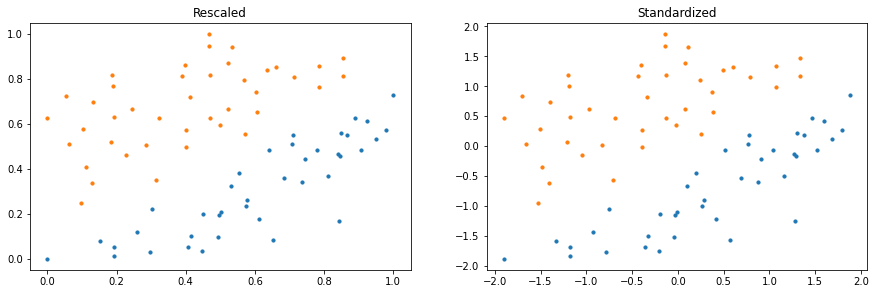

In [39]:
def plot_norm_input(x_train_rescaled, x_train_standardized):
    fig2 = plt.figure(figsize=(15, 10))
    ax1 = fig2.add_subplot(221)
    ax2 = fig2.add_subplot(222)
    plot_2d(x_train_rescaled, y_train, 'Rescaled', ax1)
    plot_2d(x_train_standardized, y_train, 'Standardized', ax2)
plot_norm_input(x_train_rescaled, x_train_standardized)

**Formula for Hypothesis and Sigmoid:**<br>
![alt text](https://github.com/Gauravhulmukh/programming-foundation-with-python-from-udacity/blob/master/lr%20hypo%20and%20sigmoid.png?raw=true)

In [0]:
def net_input(theta_coeff,x):
  #Weighted sum of inputs
  return x.dot(theta_coeff)

In [0]:
def sigmoid(x):
  #Activation function used to map input between 0 and 1
  return np.divide(1,(1 + np.exp(-x)))

In [0]:
def probability(theta_coeff,x):
  #Returns the probability of each of the weighted inputs wrt to sigmoidal function
  return sigmoid(net_input(theta_coeff,x))

**Formula for Cost Function:**<br>
![alt text](https://github.com/Gauravhulmukh/programming-foundation-with-python-from-udacity/blob/master/logistisc%20regression%20cost%20function.png?raw=true)

In [0]:
def cost_function(theta_coeff,x,y):
  # Computes the cost/error of using theta_coeff as coefficients wrt to training data
  return -(1/x.shape[0]) * np.sum((y * np.log(probability(theta_coeff,x))) + ((1-y) * np.log(1-probability(theta_coeff,x))))

In [0]:
def compute_gradient(theta_coeff,x,y):
  return (1/x.shape[0]) * np.dot(x.T, (probability(theta_coeff, x) - y))

In [0]:
def gradient_descent(x,y,iterations,learning_rate):
  '''
  Input:
  x= input data/variables
  y= output data/variables
  iterations = No.of Epochs/Steps.
  learning rate =  configurable hyperparameter used to obtain smallest positive value.

  Ouput:
  theta_coeff(array) = Best set of coefficients for linear model
  cost_history(array) = cost history wrt coefficient while performing descent.
  '''
  # Container to store cost history as the descent progresses
  cost_history = []
    
  # Initialize coefficients with random values
  theta_coeff = np.array([0] * x.shape[1])
  print(theta_coeff)
  for iteration in range(iterations):
    gradients = compute_gradient(theta_coeff,x,y)
    theta_coeff = theta_coeff - (learning_rate * gradients)
    cost = cost_function(theta_coeff,x,y)
    cost_history.append(cost) # Store the new cost
  return theta_coeff, cost_history

In [0]:
alpha = 0.001
bias_variable = np.ones(len(x_train))
x_train_biased = np.column_stack([bias_variable, x_train])

In [68]:
best_theta_coeff, cost_history = gradient_descent(x_train_biased, y_train, 100000, alpha)

[0 0 0]


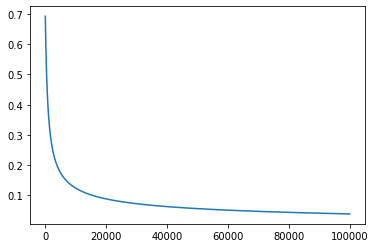

In [69]:
plt.plot(cost_history)

In [0]:
def get_predictions(theta_coeff,x_input):
  bias_variable = np.ones(len(x_input))
  new_x_input = np.column_stack([bias_variable,x_input])
  preds = probability(theta_coeff,new_x_input)
  return preds

In [0]:
def accuracy(theta_coeff,x,y,threshold = 0.5):
  class_preds = (get_predictions(theta_coeff,x) >= 0.5).astype(int).flatten()
  accuracy = np.mean(class_preds == y) * 100
  return accuracy

In [0]:
y_pred_train = get_predictions(best_theta_coeff,x_train)
y_pred_test = get_predictions(best_theta_coeff,x_test)

In [0]:
train_acc = accuracy(best_theta_coeff, x_train, y_train)
test_acc = accuracy(best_theta_coeff, x_test, y_test)

In [81]:
print(f"Training accuracy = {train_acc}")
print(f"Testing accuracy = {test_acc}")

Training accuracy = 100.0
Testing accuracy = 100.0
